## Model Evaluator Notebook

In [1]:
# NOTE: Ideally, we will replace this sys.path.append later
import sys
sys.path.append("../")
sys.path.append("../../")
sys.path.append("../../../")

from tasks.evaluate_model.src.model_evaluator import *
from tasks.data_loader.src.utils import *

### Import data

In [2]:
dataset_fname = "../input/sample_dataset.json"
model_preds_fname = "../input/sample_model_output.json"

In [3]:
dataset = load_file(dataset_fname)
model_preds = load_file(model_preds_fname) 

In [4]:
dataset_fname = "../input/sample_dataset.json"
model_preds_fname = "../input/sample_model_output.json"

dataset = load_file(dataset_fname)
model_preds = load_file(model_preds_fname)

# Sort the model predictions in the same order as the dataset
dataset_pairs = labeled_sentences_from_dataset(dataset)
sorted_preds = sort_model_preds(dataset_pairs, model_preds)

y_true = labels_from_dataset(dataset)
y_pred = labels_from_model_output(sorted_preds)
y_true, y_pred

([1, 0, 2, 0, 1, 1, 3, 4], [1, 0, 1, 2, 1, 2, 3, 2])

For testing purposes, we will use random values as if we already had multiple data points from a data set, as well as predictions from our classifier.

In [5]:
LABEL_NAMES = ["No incentive", "Direct payment (PES)", "Tax deduction", "Credit/guarantee", "Technical assistance", "Supplies", "Fine"]
y_true = np.random.randint(len(LABEL_NAMES), size=500)
y_pred = np.random.randint(len(LABEL_NAMES), size=500)

### Using the evaluator

The model evaluator can be used to evaluate multiple models within one notebook, the only requirement is to have the true labels and the predicted labels. 

We can do this for both multi-class classification problems, as well as binary classification - but we would have to create 2 different ModelEvaluators for them.

#### Multi-class setting

1. We only need to instantiate the evaluator once. If we want, we can feed the true labels `y_true` and predicted labels `y_pred` here, but if not, we can do it later as well.

In [6]:
evaluator = ModelEvaluator(LABEL_NAMES)

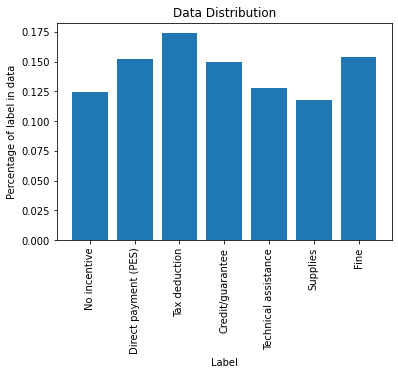

Label counts:
{'No incentive': 0.124, 'Direct payment (PES)': 0.152, 'Tax deduction': 0.174, 'Credit/guarantee': 0.15, 'Technical assistance': 0.128, 'Supplies': 0.118, 'Fine': 0.154}


In [7]:
evaluator.plot_data_distribution(y_true)

2. If we haven't given `y_true` and `y_pred` yet, we can either use `evaluator.update(y_true, y_pred)` and that will calculate basic metrics such as recall, precision or accuracy.

In [8]:
evaluator.update(y_true, y_pred)
print("Recall per class:", evaluator.recall)
print("Average weighted precision:", evaluator.avg_precision[1])

Recall per class: [0.16129032 0.13157895 0.13793103 0.2        0.1875     0.20338983
 0.12987013]
Average weighted precision: 0.16450007705691466


3. If we want a full evaluation cycle, we use the `evaluate()` method. It will make a call to `evaluator.update()` before running the metrics and plotting. 

The metrics supported are:
- Precision
- Recall (Sensitivity)
- Accuracy
- Specificity
- Confusion matrix
- Precision-Recall curve (TODO: Add this to the update function, for now it must be called separately)

_Note_: Since the cosine similarity is more related to the automatic labeling process that sBERT is involved in and not necessarily the classification process itself, I haven't included it here.

These are the parameters to the evaluate function:

- `plot_cm`: (boolean) Plot confusion matrix 
- `normalize`: (boolean) Normalize the confusion matrix content
- `store`: (boolean) Store the plots and the results dataframe. If this is set to `True`, then `exp_name` MUST have a value and it can't be None. The files will be stored in the `evaluate_model/output/` folder.
- `exp_name`: (str) The name of the model or the experiment, useful if we will want to store files (e.g `test_BETO_1`). 

Stored confusion matrix: ../output/test_run_cm.png


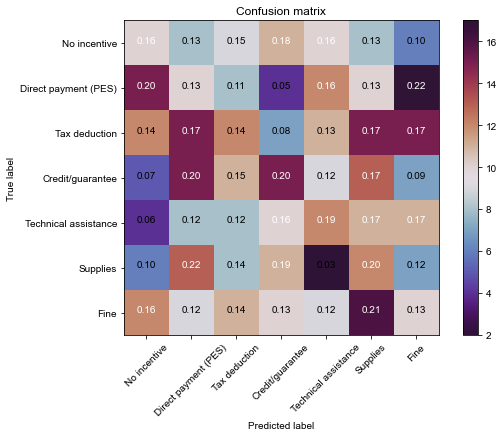

Stored results: ../output/test_run_results.csv


,Precision,Recall (Sensitivity),True negative rate (Specificity),F1-score
No incentive,0.16,0.16,0.88,0.16
Direct payment (PES),0.13,0.13,0.84,0.13
Tax deduction,0.18,0.14,0.87,0.16
Credit/guarantee,0.22,0.2,0.88,0.21
Technical assistance,0.18,0.19,0.88,0.19
Supplies,0.14,0.2,0.83,0.17
Fine,0.14,0.13,0.85,0.13
-----,-----,-----,-----,-----
Macro avg,0.16,0.16,0.86,0.16
Weighted avg,0.16,0.16,0.86,0.16


In [9]:
evaluator.evaluate(y_true, y_pred, 
                   plot_cm=True, normalize=True, 
                   store=True, exp_name="test_run")

Stored Precision-Recall Curve: test_run_prc.png


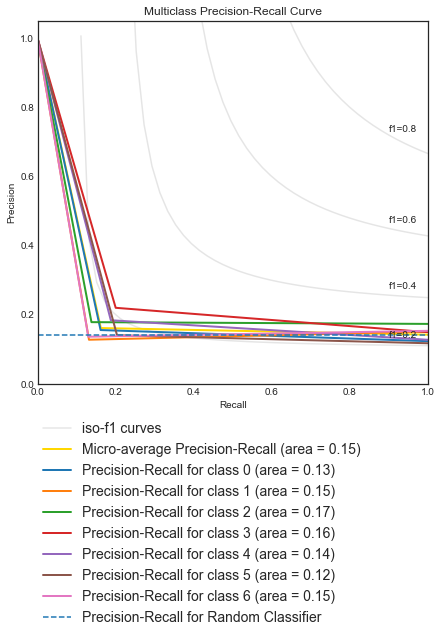

In [10]:
evaluator.plot_precision_recall_curve(y_true, y_pred, bin_class=False, all_classes=True, store=True, exp_name="test_run")

#### Binary classification setting

In [11]:
LABEL_NAMES = ["No incentive", "Incentive"]
y_true = np.random.randint(len(LABEL_NAMES), size=500)
y_pred = np.random.randint(len(LABEL_NAMES), size=500)
y_probs = np.random.random(500)

In [12]:
evaluator = ModelEvaluator(LABEL_NAMES)

Stored confusion matrix: ../output/bin_test_run_cm.png


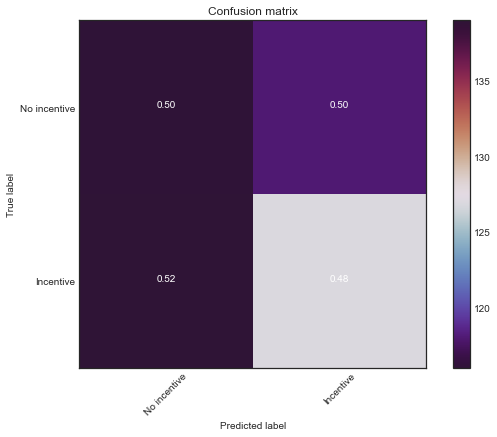

Stored results: ../output/bin_test_run_results.csv


,Precision,Recall (Sensitivity),True negative rate (Specificity),F1-score
No incentive,0.45,0.5,0.48,0.47
Incentive,0.52,0.48,0.5,0.5
-----,-----,-----,-----,-----
Macro avg,0.49,0.49,0.49,0.49
Weighted avg,0.49,0.49,0.49,0.49
Accuracy,-----,-----,-----,0.486


In [13]:
evaluator.evaluate(y_true, y_pred, 
                   plot_cm=True, normalize=True, 
                   store=True, exp_name="bin_test_run")

### Important Note: 
__The second argument to plot the precision-recall curve when working on a binary classifier has to be a numpy array of probabilities, not labels!__

Hence we feed `y_probs` instead of `y_preds` here

Stored Precision-Recall Curve: bin_test_run_prc.png


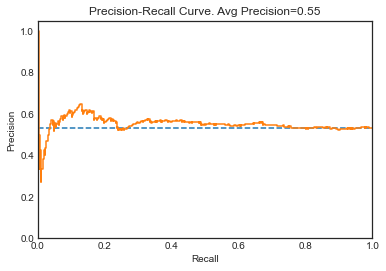

In [14]:
evaluator.plot_precision_recall_curve(y_true, y_probs, bin_class=True, store=True, exp_name="bin_test_run")